Overall Goal: The code aims to build, train, evaluate, and deploy a machine learning model for sentiment analysis. It will classify movie reviews as either "positive" or "negative."

Workflow:

Setup and Environment Preparation:
Install Libraries:

Necessary Python libraries (nltk for natural language processing tasks and scikit-learn for machine learning functionalities) are installed.
Import Modules: Relevant modules from these libraries and standard Python libraries (like os for file system interaction, pandas for data manipulation, matplotlib for plotting) are imported.
Download NLTK Resources: Specific NLTK resources (punkt for tokenization, stopwords for a list of common English stop words, wordnet for lemmatization, and punkt_tab) are downloaded. These are essential for the text preprocessing steps.

Data Acquisition and Loading:
Download Dataset:

The IMDb movie review dataset is downloaded from a specified URL. This dataset contains 50,000 movie reviews, labeled as positive or negative.
Extract Dataset: The downloaded compressed file (.tar.gz) is extracted, making the raw text files of the reviews accessible.
Define Data Loading Function (load_data): A custom function is created to read the individual review text files. It iterates through 'pos' (positive) and 'neg' (negative) subdirectories for a given path (e.g., the training set), reads each review file, and stores the text along with its corresponding label ('pos' or 'neg').
Load Training Data: The load_data function is used to load the training reviews into a Pandas DataFrame.
Label Encoding: The sentiment labels ('pos', 'neg') in the DataFrame are converted into numerical format (1 for 'pos', 0 for 'neg'), as machine learning models typically require numerical input.

Text Preprocessing:
Initialize Tools:

A WordNetLemmatizer (to reduce words to their base or dictionary form) and a set of English stopwords are initialized.
Define Preprocessing Function (preprocess_text): A function is defined to clean and normalize the review texts. This function performs:
Lowercasing: Converts text to lowercase.
Tokenization: Splits text into individual words (tokens).
Filtering and Lemmatization: Removes punctuation, non-alphanumeric tokens, and stop words. The remaining words are then lemmatized.
Rejoining: The processed tokens are joined back into a single string.
Apply Preprocessing: The preprocess_text function is applied to all reviews in the 'text' column of the DataFrame, transforming the raw text into a cleaner, more standardized format.

Feature Engineering and Data Splitting:
Train-Test Split:

The preprocessed dataset (features: 'text', target: 'sentiment') is divided into a training set (used to train the model) and a test set (used to evaluate the trained model's performance on unseen data). Typically, 80% for training and 20% for testing.
TF-IDF Vectorization:
A TfidfVectorizer is initialized. TF-IDF (Term Frequency-Inverse Document Frequency) converts text data into numerical feature vectors. It gives higher weight to words that are frequent in a specific document but not frequent across all documents.
The vectorizer is fit_transformed on the training text data. This means it learns the vocabulary from the training data and then transforms this training text into a TF-IDF matrix.
The same fitted vectorizer is then used to transform the test text data, ensuring consistency and preventing data leakage.

Model Training:
Initialize Model:

A LogisticRegression classifier is chosen as the machine learning model. This is a linear model commonly used for binary classification tasks.
Train Model: The Logistic Regression model is trained (fit) using the TF-IDF features of the training set (X_train_tfidf) and their corresponding sentiment labels (y_train). The model learns the relationship between the word features and the sentiment.

Model Evaluation:
Make Predictions:

The trained model is used to predict sentiment labels for the TF-IDF features of the unseen test data (X_test_tfidf).
Calculate Metrics:
Accuracy: The proportion of correctly classified reviews is calculated.
Classification Report: A detailed report is generated, showing precision, recall, F1-score, and support for both positive and negative classes.
Visualize Performance:
Confusion Matrix: A matrix is plotted to visualize the model's performance, showing counts of true positives, true negatives, false positives, and false negatives.
ROC Curve and AUC: The Receiver Operating Characteristic (ROC) curve is plotted, and the Area Under the Curve (AUC) is calculated. This helps assess the model's ability to distinguish between positive and negative classes across different probability thresholds.

Model Persistence (Saving):

The trained Logistic Regression model and the fitted TF-IDF vectorizer are saved to disk using joblib. This allows them to be loaded and reused later without needing to retrain the model or refit the vectorizer from scratch.

Prediction on New, Unseen Data:
Define Prediction Function (predict_sentiment):

A function is created to take a new text review, the saved model, and the saved vectorizer as input.
Inside this function:
The new text is preprocessed using the same preprocess_text function.
The preprocessed text is transformed into TF-IDF features using the loaded vectorizer.
The loaded model predicts the sentiment.
The function returns "Positive" or "Negative".
Test with Examples: The predict_sentiment function is demonstrated by providing a few sample new reviews and printing their predicted sentiments.

Interactive User Interface (using ipywidgets in Colab):
Create Widgets:

Interactive elements are created:
A text input field (widgets.Text) for users to type their review.
A "Send" button (widgets.Button).
An output area (widgets.Output) to display the review and its predicted sentiment.
Define Event Handler: A function (on_send_button_clicked) is defined to execute when the button is clicked. This function:
Retrieves the review text from the input field.
Calls the predict_sentiment function to get the sentiment.
Displays the original review and the predicted sentiment in the output area.
Clears the input field.
Display Interface: The widgets are arranged and displayed in the Colab notebook, providing a simple interactive way to test the sentiment analysis model.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Acurácia: 0.882
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      2485
           1       0.87      0.90      0.88      2515

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



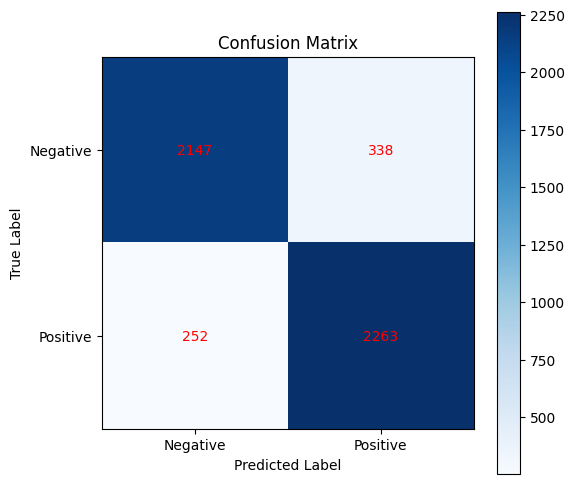

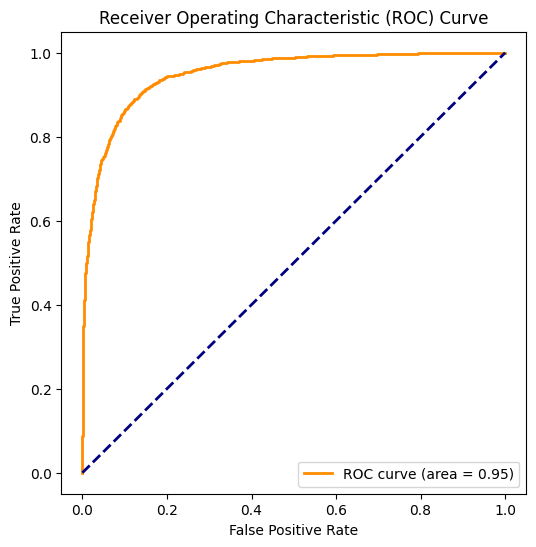

Review: This movie was fantastic! I loved every bit of it.
Predicted Sentiment: Positive

Review: The film was terrible and boring.
Predicted Sentiment: Negative

Review: It was okay, not great but not bad either.
Predicted Sentiment: Negative



In [ ]:
# Instalação de bibliotecas necessárias
!pip install nltk
!pip install scikit-learn

# Importação das bibliotecas
import nltk
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

# Download de recursos do NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')  # Adicionando o download do recurso punkt_tab

# Carregamento do conjunto de dados
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
!wget -q {url}
!tar -xf aclImdb_v1.tar.gz

# Função para carregar os dados
def load_data(path):
    data = []
    for label in ['pos', 'neg']:
        dir_path = f"{path}/{label}"
        for file in os.listdir(dir_path):
            with open(f"{dir_path}/{file}", 'r', encoding='utf-8') as f:
                text = f.read()
                data.append((text, label))
    return pd.DataFrame(data, columns=['text', 'sentiment'])

# Carregando os dados
df = load_data('aclImdb/train')
df['sentiment'] = df['sentiment'].map({'pos': 1, 'neg': 0})

# Tokenização e Lemmatização
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(tokens)

df['text'] = df['text'].apply(preprocess_text)

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Vetorização TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Treinamento do modelo
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Avaliação do modelo
y_pred = model.predict(X_test_tfidf)
print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# ROC Curve
y_pred_proba = model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model
import joblib
joblib.dump(model, 'logistic_regression_sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Function to test the model on new data
def predict_sentiment(text, model, vectorizer):
    text = preprocess_text(text)
    text_tfidf = vectorizer.transform([text])
    prediction = model.predict(text_tfidf)
    return 'Positive' if prediction[0] == 1 else 'Negative'

# Test the model on new data
new_reviews = [
    "This movie was fantastic! I loved every bit of it.",
    "The film was terrible and boring.",
    "It was okay, not great but not bad either."
]

for review in new_reviews:
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {predict_sentiment(review, model, vectorizer)}\n")

import ipywidgets as widgets
from IPython.display import display

# Create an output widget to display the conversation log
chat_output = widgets.Output()

# Create a text input widget for new review entries
text_input = widgets.Text(
    placeholder='Digite sua review para análise de sentimento...',
    description='Review:',
    layout=widgets.Layout(width='100%')
)

# Create a button widget to submit the review
send_button = widgets.Button(
    description='Enviar',
    button_style='success'
)

# Define the event handler for the send button
def on_send_button_clicked(b):
    review = text_input.value.strip()
    if review:
        with chat_output:
            # Display the entered review
            print("Review:", review)
            # Get the predicted sentiment using your predict_sentiment function
            sentiment = predict_sentiment(review, model, vectorizer)
            print("Predicted Sentiment:", sentiment)
            print("-" * 40)
    # Clear the input field after processing
    text_input.value = ""

# Attach the event handler to the button
send_button.on_click(on_send_button_clicked)

# Arrange the widgets vertically and display the chat interface
chat_interface = widgets.VBox([text_input, send_button, chat_output])
display(chat_interface)
